In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X +bias

In [3]:
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
train_split = int(0.8 * len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]

In [5]:
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c='b',s=4,label='training data')

  plt.scatter(test_data,test_labels,c='g',s=4,label='testing data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='predictions')

  plt.legend(prop={'size':14});


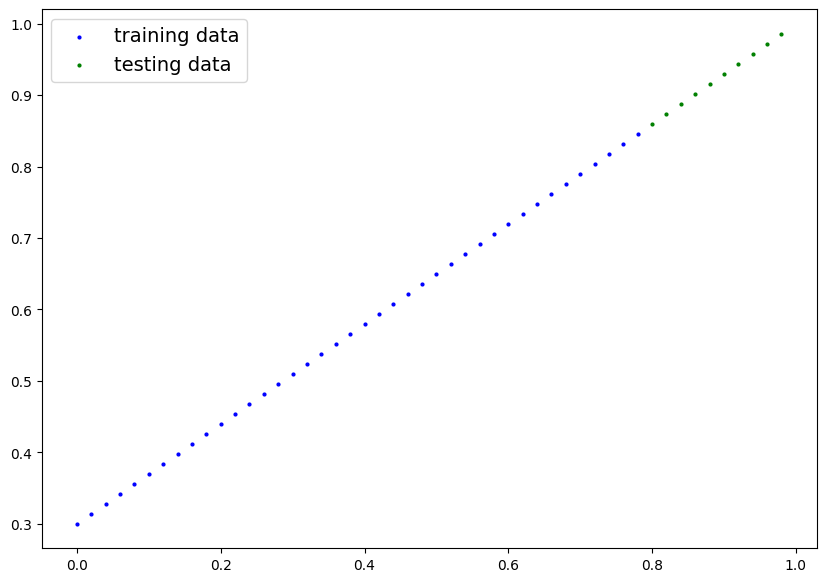

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x:torch.Tensor)-> torch.Tensor:
      return self.weights*x + self.bias

In [9]:
torch.manual_seed(42)

model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.7, 0.3)

In [12]:
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

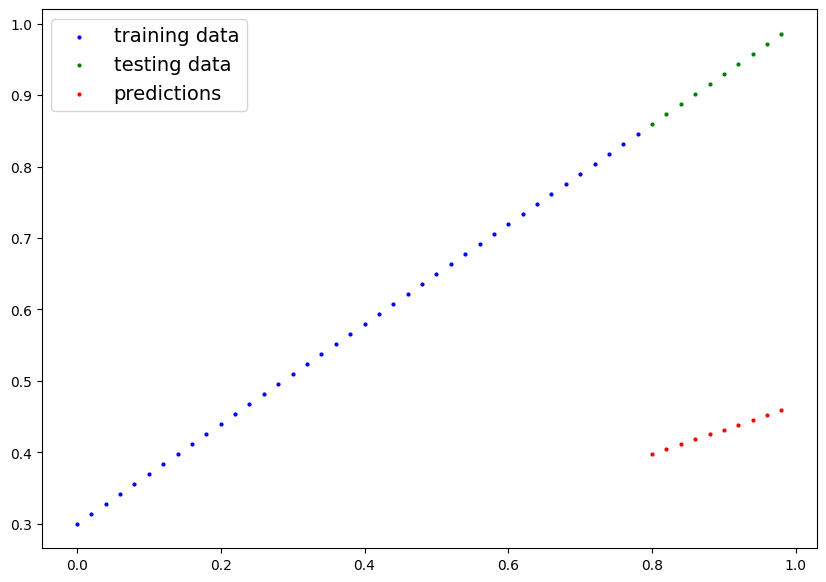

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [15]:
epochs = 1
for epech in range(epochs):
  model_0.train()
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred,y_train)
  print(f"loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  print(model_0.state_dict())

loss: 0.31288138031959534
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})


In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [17]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

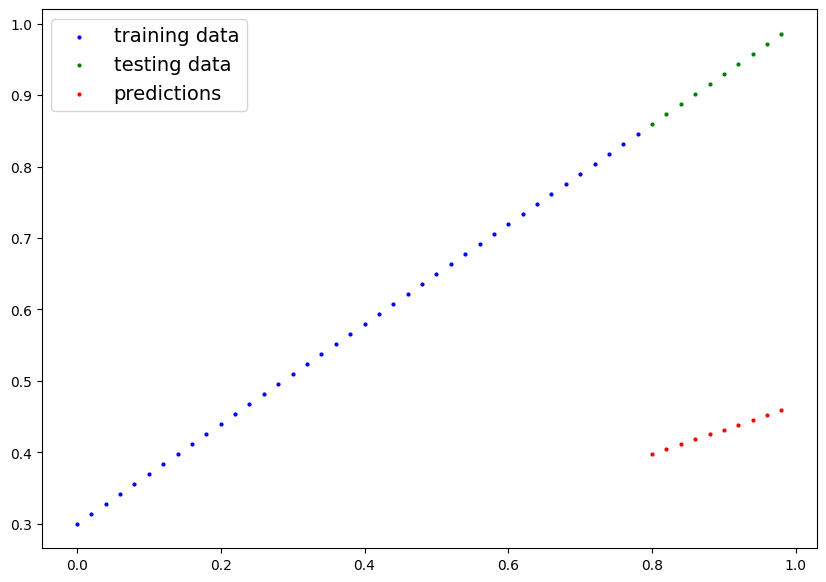

In [18]:
plot_predictions(predictions=y_preds)

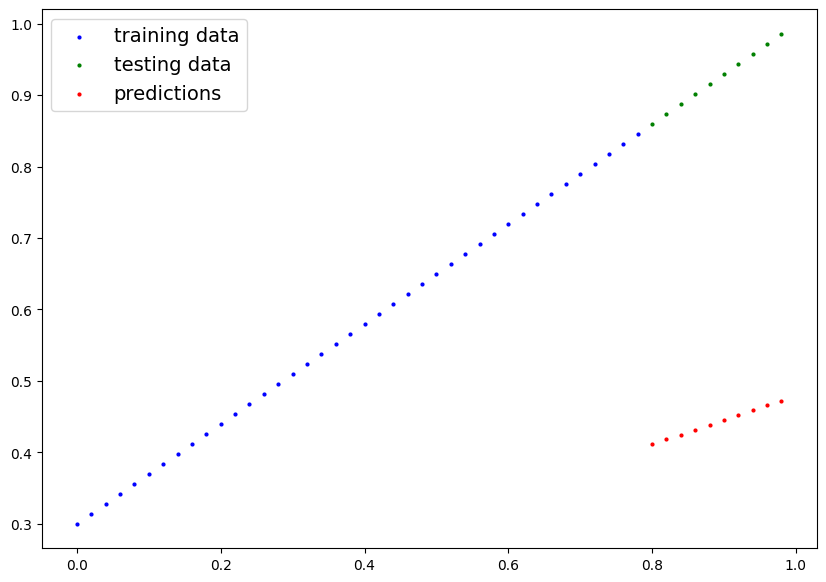

In [19]:
plot_predictions(predictions=y_preds_new)

In [20]:
epochs = 200

epoch_count= []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(x_train)
  loss = loss_fn(y_pred,y_train)
  #print(f"loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")
    print(model_0.state_dict())

epoch: 0 | loss: 0.3013603389263153 | test loss: 0.4675942063331604
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
epoch: 10 | loss: 0.18615034222602844 | test loss: 0.3328842222690582
OrderedDict({'weights': tensor([0.3835]), 'bias': tensor([0.2488])})
epoch: 20 | loss: 0.08227583020925522 | test loss: 0.2069590985774994
OrderedDict({'weights': tensor([0.4222]), 'bias': tensor([0.3403])})
epoch: 30 | loss: 0.05181945487856865 | test loss: 0.14023718237876892
OrderedDict({'weights': tensor([0.4539]), 'bias': tensor([0.3788])})
epoch: 40 | loss: 0.04503796249628067 | test loss: 0.11182951927185059
OrderedDict({'weights': tensor([0.4768]), 'bias': tensor([0.3868])})
epoch: 50 | loss: 0.04132963344454765 | test loss: 0.09809747338294983
OrderedDict({'weights': tensor([0.4956]), 'bias': tensor([0.3838])})
epoch: 60 | loss: 0.03785243630409241 | test loss: 0.08776430785655975
OrderedDict({'weights': tensor([0.5134]), 'bias': tensor([0.3783])})
epoch: 70 | loss: 0.03441

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

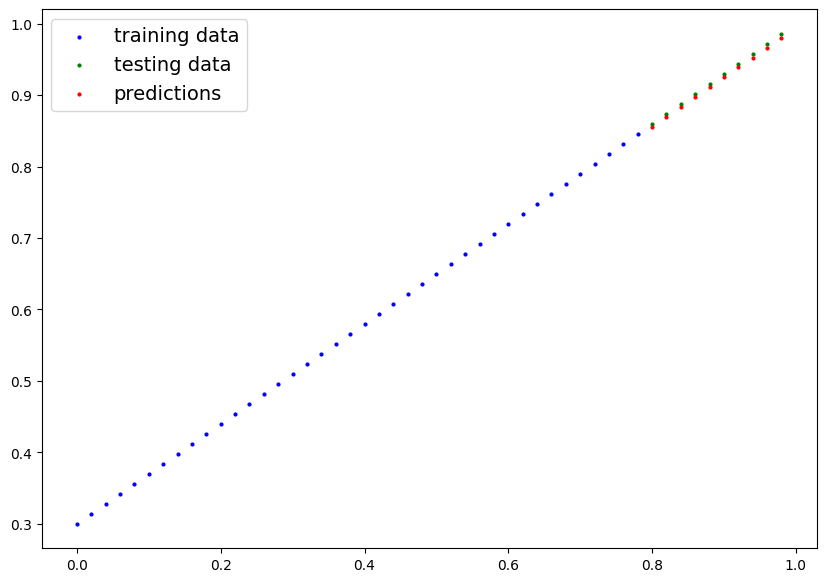

In [23]:
plot_predictions(predictions =y_preds_new)

In [24]:
import numpy as np

/tmp/ipython-input-3394113654.py:1: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label= "Train loss")


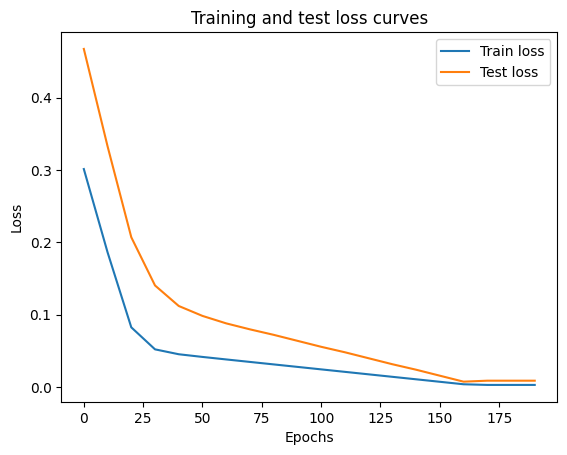

In [25]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label= "Train loss")
plt.plot(epoch_count,test_loss_values,label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [26]:
from pathlib import Path

In [27]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok = True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [28]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Dec  6 08:07 01_pytorch_workflow_model_0.pth


In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [30]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [32]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [33]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [34]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device: {device}')

using device: cpu


In [36]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
train_split = int(0.8 * len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]

In [38]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [39]:
next(model_1.parameters()).device

device(type='cpu')

In [40]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [41]:
loss_fn = nn.L1Loss() #mae
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [44]:
torch.manual_seed(42)

epochs = 200
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss= loss_fn(test_pred,y_test)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

Epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5739762187004089
Epoch: 10 | loss: 0.4399680495262146 | test loss: 0.4392663538455963
Epoch: 20 | loss: 0.3247582018375397 | test loss: 0.30455657839775085
Epoch: 30 | loss: 0.20954827964305878 | test loss: 0.16984674334526062
Epoch: 40 | loss: 0.09433844685554504 | test loss: 0.03513689711689949
Epoch: 50 | loss: 0.023886386305093765 | test loss: 0.04784906655550003
Epoch: 60 | loss: 0.0199567973613739 | test loss: 0.04580312222242355
Epoch: 70 | loss: 0.016517987474799156 | test loss: 0.0375305712223053
Epoch: 80 | loss: 0.013089170679450035 | test loss: 0.029944902285933495
Epoch: 90 | loss: 0.009653178043663502 | test loss: 0.02167237363755703
Epoch: 100 | loss: 0.006215679459273815 | test loss: 0.014086711220443249
Epoch: 110 | loss: 0.002787243574857712 | test loss: 0.005814164876937866
Epoch: 120 | loss: 0.0012645035749301314 | test loss: 0.013801807537674904
Epoch: 130 | loss: 0.0012645035749301314 | test loss: 0.01380180753767

In [45]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [46]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(x_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

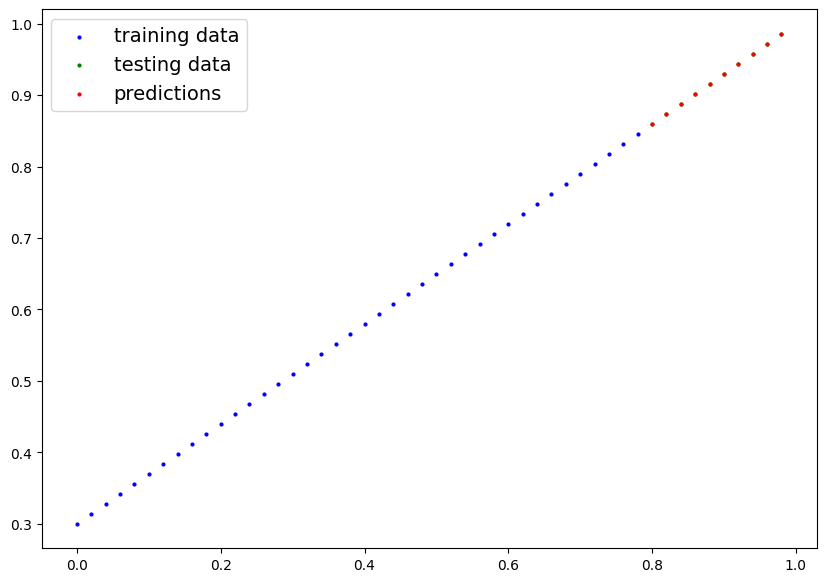

In [47]:
plot_predictions(predictions=y_preds)

In [49]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),f = MODEL_SAVE_PATH )

saving model to: models/01_pytorch_workflow_model_1.pth


In [54]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [55]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [56]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)

loaded_model_1_preds==y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])